In [ ]:
import pandas as pd

pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.getLogger("matplotlib.font_manager").disabled = True

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("./data/cleaned.csv")

In [2]:
from pycaret.regression import *

clf = setup(data=df, target="quality", session_id=42)

best_model = compare_models(exclude=["lightgbm"])  # doesn't work why?

predict_model(best_model)

,Description,Value
0,Session id,42
1,Target,quality
2,Target type,Regression
3,Original data shape,"(3973, 12)"
4,Transformed data shape,"(3973, 12)"
5,Transformed train set shape,"(2781, 12)"
6,Transformed test set shape,"(1192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4099,0.3780,0.6142,0.4880,0.0909,0.0721,0.1040
rf,Random Forest Regressor,0.4554,0.3933,0.6263,0.4673,0.0925,0.0799,0.1980
gbr,Gradient Boosting Regressor,0.5363,0.4705,0.6855,0.3626,0.1009,0.0934,0.0780
ada,AdaBoost Regressor,0.5832,0.5468,0.7388,0.2595,0.1093,0.1035,0.0430
lr,Linear Regression,0.5834,0.5638,0.7502,0.2373,0.1101,0.1017,0.4100
lar,Least Angle Regression,0.5833,0.5639,0.7502,0.2372,0.1101,0.1017,0.0070
ridge,Ridge Regression,0.5866,0.5708,0.7549,0.2278,0.1108,0.1023,0.0080
br,Bayesian Ridge,0.5868,0.5711,0.7551,0.2274,0.1108,0.1023,0.0080
huber,Huber Regressor,0.5887,0.5759,0.7583,0.2210,0.1112,0.1023,0.0150
knn,K Neighbors Regressor,0.6204,0.6526,0.8075,0.1145,0.1176,0.1077,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3678,0.3077,0.5547,0.5633,0.0807,0.0634


,sulfur dioxide diff,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label
3960,88.0,4.9,0.47,0.17,1.9,0.035,60.0,0.98964,3.27,0.35,11.5,6,6.04
3742,58.0,5.9,0.42,0.36,2.4,0.034,19.0,0.99184,3.25,0.48,10.9,5,5.99
3783,67.0,7.3,0.17,0.36,8.2,0.028,44.0,0.99272,3.14,0.41,12.4,6,6.00
2542,87.0,5.7,0.20,0.30,2.5,0.046,38.0,0.99276,3.34,0.50,9.9,6,5.84
109,75.0,8.5,0.21,0.41,4.3,0.036,24.0,0.99470,3.18,0.53,9.7,6,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,63.0,7.0,0.48,0.12,4.5,0.050,23.0,0.99398,2.86,0.35,9.0,5,5.00
3603,99.0,6.4,0.28,0.22,12.8,0.039,51.0,0.99535,3.23,0.43,10.7,6,5.78
2314,85.0,6.6,0.23,0.30,14.9,0.051,33.0,0.99835,3.04,0.54,9.0,6,6.00
1037,211.0,6.7,0.18,0.30,6.4,0.048,40.0,0.99560,3.29,0.52,10.0,5,5.00


In [ ]:
from scipy import stats
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 데이터 분리
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 학습
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
residuals = y_test - y_pred

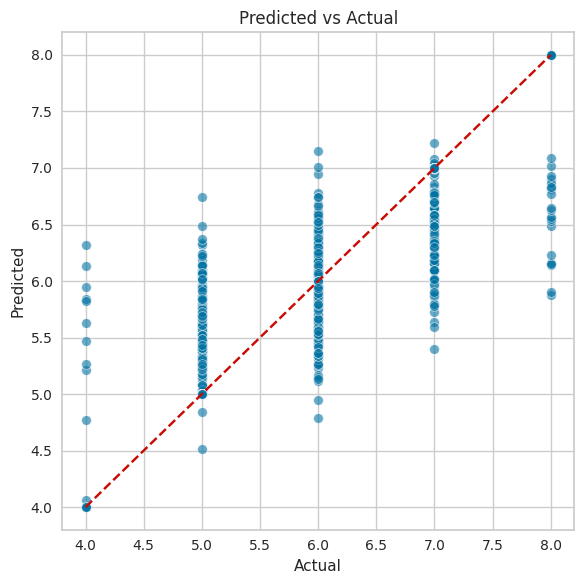

In [ ]:
# -----------------------------
# 1. 예측 vs 실제 (산점도)
# -----------------------------
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

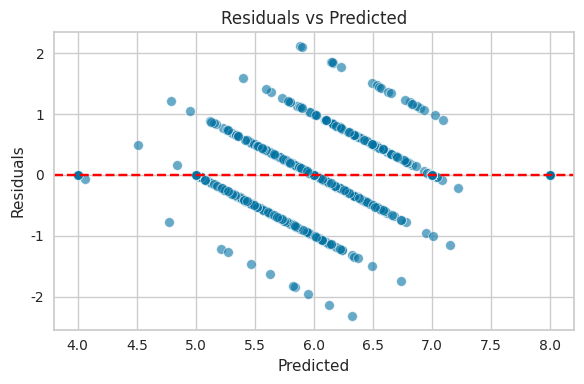

In [ ]:
# -----------------------------
# 2. 잔차 플롯
# -----------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

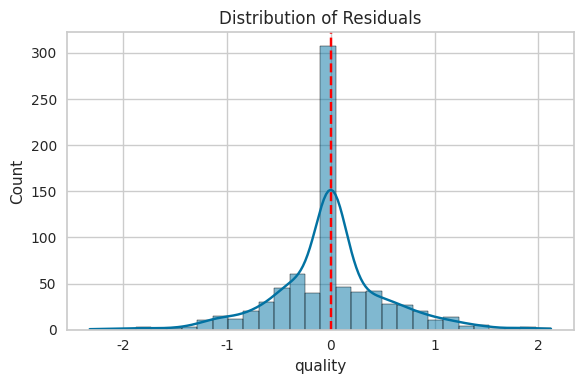

In [ ]:
# -----------------------------
# 3. 잔차 히스토그램
# -----------------------------
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

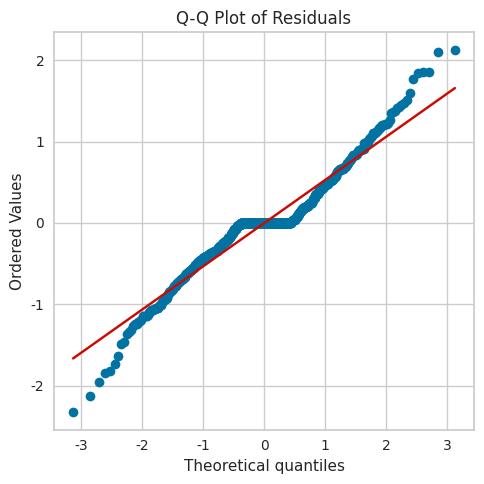

In [ ]:
# -----------------------------
# 4. Q-Q 플롯
# -----------------------------
plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# -----------------------------
# 5. 평가 지표 출력
# -----------------------------
print(f"R² Score       : {r2_score(y_test, y_pred):.4f}")
print(f"MAE (오차 평균): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE           : {mean_squared_error(y_test, y_pred, squared=False):.4f}")

R² Score       : 0.5817
MAE (오차 평균): 0.3530
RMSE           : 0.5470
